<a href="https://colab.research.google.com/github/prasadmenonsrees/Neural_Network/blob/master/Image_classification_using_CNNs_in_Keras_(weed_vs_crop_seedling).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='blue'>Project - Image classification using CNNs in Keras</font>


*Prasad Menon*

**Data Description:**


You are provided with a dataset of images of plant seedlings at various stages of grown. Each image has a filename that is its
unique id. The dataset comprises 12 plant species. The goal of the project is to create a classifier capable of determining a plant's
species from a photo.


**Dataset:**
The dataset can be download from Olympus.
The data file names are:


 images.npy


 Label.csv


**Context:**


Can you differentiate a weed from a crop seedling?
The ability to do so effectively can mean better crop yields and better stewardship of the environment.
The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has
recently released a dataset containing images of unique plants belonging to 12 species at several growth stages

# <font color='blue'>Step 1</font>


Import the libraries, load dataset, print shape of data, visualize the images in dataset. (5 Marks)

**Import Libraries**

In [1]:
import tensorflow
import matplotlib.pyplot as plt
tensorflow.__version__

import numpy as np
import pandas as pd
import seaborn as sns

from tensorflow.keras.models import Sequential          # Sequential groups a linear stack of layers into a tf.keras.Model.
from tensorflow.keras.layers import Conv2D              # This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.
from tensorflow.keras.layers import MaxPooling2D        # Max pooling operation for 2D spatial data.
from tensorflow.keras.layers import Flatten             # Flattens the input before giving to densely connected NN layer
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization      # Dropout: Applies Dropout to the input.
                                                                            # Dense:  regular densely-connected NN layer.
                                                                            # BatchNormalization : Normalize and scale inputs or activations.
from tensorflow.keras.preprocessing.image import ImageDataGenerator         # Generate batches of tensor image data with real-time data augmentation.

#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


import cv2
from google.colab.patches import cv2_imshow

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


**Load DataSet**

In [3]:
project_path =  '/content/drive/My Drive/Neural_Network/Computer Vision/latest_project/'

# Load the image file of dataset
images = np.load(project_path + 'images.npy')

# Load the labels file of dataset
labels = pd.read_csv(project_path + 'Labels.csv')

**Shape of Data**

In [4]:
# This shows that there are 4750 images of 128*128 shape and its a color image
print(images.shape)

(4750, 128, 128, 3)


In [5]:
# This shows that there are 4750 labels provided
print(labels.shape)

(4750, 1)


In [6]:
print('The shape of image is: ', images.shape)
# Extracting the height and width of an image 
h, w = images.shape[:2] 
# Displaying the height and width 
print("Height = {},  Width = {}".format(h, w)) 

The shape of image is:  (4750, 128, 128, 3)
Height = 4750,  Width = 128


**Visualize Images in a Dataset**

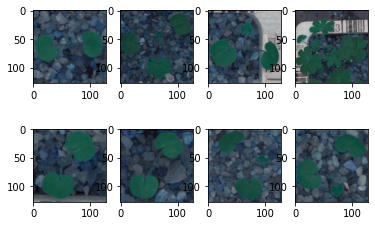

In [7]:
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i])

AxesImage(54,36;334.8x217.44)


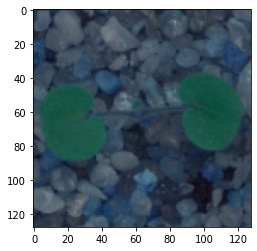

In [8]:
print(plt.imshow(images[0]))

# <font color='blue'>Step 2</font>

Data Pre-processing: (15 Marks)


a. Normalization.


b. Gaussian Blurring.

c. Visualize data after pre-processing.

**Normalization**

In [9]:
# Normalize the data
images = images.astype('float32') / 255.0

**Gaussian Blurring**

In [10]:
blurImages = []
for img in images:
    # Use gaussian blur
    blurImg = cv2.GaussianBlur(img, (5, 5), 0)
    blurImages.append(blurImg)
blurImages = np.asarray(blurImages)

**Visualize data after pre-processing**



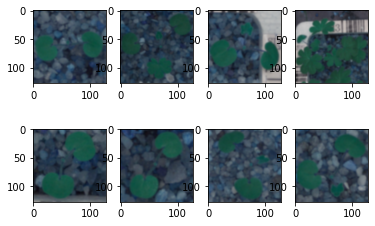

In [11]:
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(blurImages[i])

**Comparing same Image before vs After Gaussian Blurring**

AxesImage(54,36;334.8x217.44)


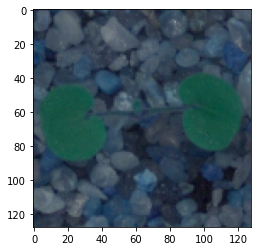

In [12]:
# Before Blurring
print(plt.imshow(images[0]))

AxesImage(54,36;334.8x217.44)


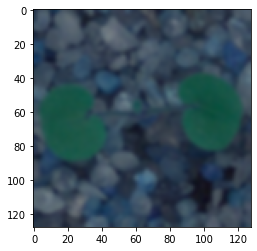

In [13]:
# Same image, After Blurring
print(plt.imshow(blurImages[0]))

**Is the Data balanced**

Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Common wheat                 221
Maize                        221
Name: Label, dtype: int64


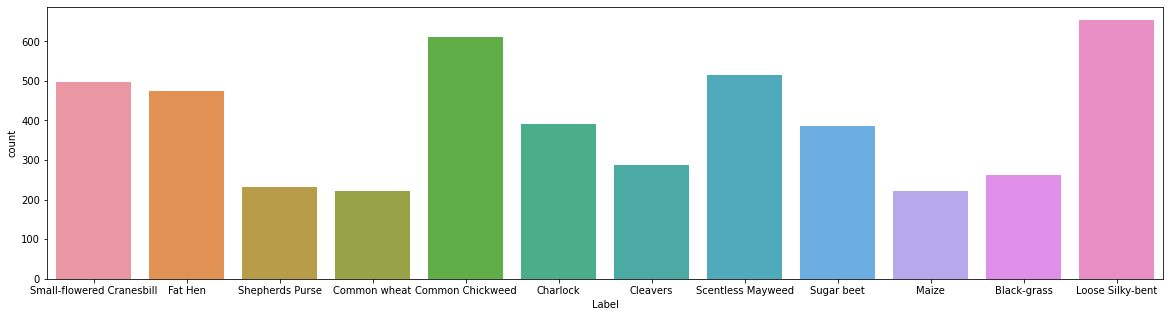

In [14]:
y = labels['Label']
print(y.value_counts())
plt.figure(figsize=(20,5)) 
g = sns.countplot(y)
# No, Here we can see that the data is not balanced

# <font color='blue'>Step 3</font>

**Make data compatible: (10 Marks)**


a. Convert labels to one-hot-vectors.


b. Print the label for y_train[0].


c. Split the dataset into training, testing, and validation set.
(Hint: First split images and labels into training and testing set with test_size = 0.3. Then further split test data
into test and validation set with test_size = 0.5)


d. Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s
already in the compatible shape, then comment in the notebook that it’s already in compatible shape.

**Converting Label to one-hot-vectors**



In [15]:
one_hot_encode = pd.get_dummies(labels['Label'])
one_hot_encode

,Black-grass,Charlock,Cleavers,Common Chickweed,Common wheat,Fat Hen,Loose Silky-bent,Maize,Scentless Mayweed,Shepherds Purse,Small-flowered Cranesbill,Sugar beet
0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4745,0,0,0,0,0,0,1,0,0,0,0,0
4746,0,0,0,0,0,0,1,0,0,0,0,0
4747,0,0,0,0,0,0,1,0,0,0,0,0
4748,0,0,0,0,0,0,1,0,0,0,0,0


**Print the label for y[0]**


In [16]:
print(np.asarray(one_hot_encode)[0])
# Here we can see that the labels are one hot encoded correctly

[0 0 0 0 0 0 0 0 0 0 1 0]


**Split images and labels into training and testing set with test_size = 0.3**

In [17]:


# Dividing the data into training and test and split in 70-20 ratio
x_train, x_test, y_train, y_test = train_test_split(blurImages, one_hot_encode, test_size=0.30, random_state=1)

print(x_train.shape)
print(x_test.shape)


print(y_train.shape)
print(y_test.shape)

# There are 3325 images for training and 1425 images for testing

(3325, 128, 128, 3)
(1425, 128, 128, 3)
(3325, 12)
(1425, 12)


**Split test data into test and validation set with test_size = 0.5**

In [18]:
# Dividing the test data into test and validation set in 50-50 ratio
x_validation, x_test_main, y_validation, y_test_main = train_test_split(x_test, y_test, test_size=0.50, random_state=1)

print(x_validation.shape)
print(x_test_main.shape)


print(y_validation.shape)
print(y_test_main.shape)

# There are 712 images for validation and 713 images for testing

(712, 128, 128, 3)
(713, 128, 128, 3)
(712, 12)
(713, 12)


**Check the shape of data**

Reshape data into shapes compatible with Keras models if it’s not already.

If it’s already in the compatible shape, then comment in the notebook that it’s already in compatible shape

In [19]:
print(images.shape)  # images are of shape 128*128*3

# The images are already of compatible shape 128*128*3

(4750, 128, 128, 3)


# <font color='blue'>Step 4</font>

**Building CNN: (15 Marks)**


a. Define layers.


b. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)

**Define Layers , Set Optimizer = 'adam' and use categorical crossentropy**

In [20]:
def createModel():
  model = Sequential()

  model.add(Conv2D(filters=64, kernel_size=(5, 5), input_shape=(128, 128, 3), activation='relu'))
  model.add(BatchNormalization(axis=3))
  model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(BatchNormalization(axis=3))
  model.add(Dropout(0.1))


  model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
  model.add(BatchNormalization(axis=3))
  model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(BatchNormalization(axis=3))
  model.add(Dropout(0.1))

  model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
  model.add(BatchNormalization(axis=3))
  model.add(Conv2D(filters=256, kernel_size=(5, 5), activation='relu'))
  model.add(MaxPooling2D((2, 2)))
  model.add(BatchNormalization(axis=3))
  model.add(Dropout(0.1))

  model.add(Flatten())

  model.add(Dense(256, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))

  model.add(Dense(256, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))

  model.add(Dense(12, activation='softmax'))

  model.summary()

  # compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

**Real-time data augmentation**

In [50]:

training_augumentation = ImageDataGenerator(rotation_range=30,
                                            width_shift_range=0.1,
                                            height_shift_range=0.1,
                                            shear_range = 0.2,
                                            zoom_range = 0.2,
                                            horizontal_flip = True,
                                            fill_mode="nearest")

**Create Model**

In [49]:
model = createModel()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 124, 124, 64)      4864      
_________________________________________________________________
batch_normalization_8 (Batch (None, 124, 124, 64)      256       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 120, 120, 64)      102464    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 60, 60, 64)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 60, 60, 64)        256       
_________________________________________________________________
dropout_5 (Dropout)          (None, 60, 60, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 56, 56, 128)      

# <font color='blue'>Step 5</font>

**Fit and evaluate model and print confusion matrix. (10 Marks)**

**Early Stopping and Model checkpoint**

In [22]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

**Fit Model**

In [23]:
# Fit the model
history = model.fit_generator(training_augumentation.flow(x_train,y_train, batch_size = 32),
                              validation_data=(x_validation, y_validation), 
                              steps_per_epoch=len(x_train)//32,
                              epochs=50,verbose=1,
                               callbacks=[early_stopping,model_checkpoint])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
103/103 [==============================] - ETA: 0s - loss: 2.5144 - accuracy: 0.2970
Epoch 00001: val_loss improved from inf to 19.65840, saving model to cifar_cnn_checkpoint_01_loss19.6584.h5
103/103 [==============================] - 15s 144ms/step - loss: 2.5144 - accuracy: 0.2970 - val_loss: 19.6584 - val_accuracy: 0.1433
Epoch 2/50
103/103 [==============================] - ETA: 0s - loss: 1.7158 - accuracy: 0.4661
Epoch 00002: val_loss improved from 19.65840 to 14.63868, saving model to cifar_cnn_checkpoint_02_loss14.6387.h5
103/103 [==============================] - 14s 134ms/step - loss: 1.7158 - accuracy: 0.4661 - val_loss: 14.6387 - val_accuracy: 0.1419
Epoch 3/50
103/103 [==============================] - ETA: 0s - loss: 1.4635 - accuracy: 0.5254
Epoch 00003: val_loss did not improve from 14.63868
103/103 [==============================] - 14s 134ms/step - loss: 1.4635 - accuracy: 0.5254 -

In [24]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


**Plot Model Accuracy and Model Loss**

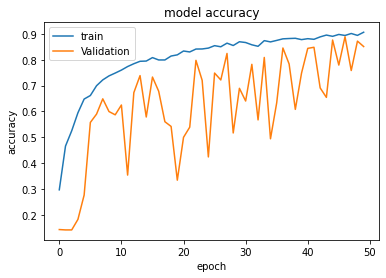

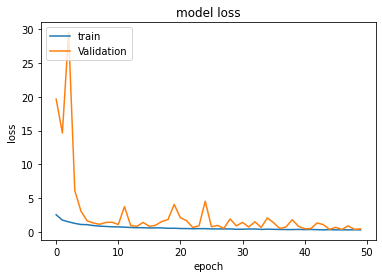

In [25]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')
plt.show()

In [26]:
!ls
# Looking for the model with the best weights

cifar_cnn_checkpoint_01_loss19.6584.h5	cifar_cnn_checkpoint_16_loss0.7934.h5
cifar_cnn_checkpoint_02_loss14.6387.h5	cifar_cnn_checkpoint_23_loss0.6295.h5
cifar_cnn_checkpoint_04_loss6.0798.h5	cifar_cnn_checkpoint_28_loss0.4939.h5
cifar_cnn_checkpoint_05_loss3.0388.h5	cifar_cnn_checkpoint_37_loss0.4750.h5
cifar_cnn_checkpoint_06_loss1.6003.h5	cifar_cnn_checkpoint_41_loss0.4544.h5
cifar_cnn_checkpoint_07_loss1.2958.h5	cifar_cnn_checkpoint_45_loss0.3559.h5
cifar_cnn_checkpoint_08_loss1.0982.h5	cifar_cnn_checkpoint_47_loss0.3418.h5
cifar_cnn_checkpoint_11_loss1.0706.h5	drive
cifar_cnn_checkpoint_13_loss0.9071.h5	sample_data
cifar_cnn_checkpoint_14_loss0.8051.h5


**Evaluvate Model**

In [27]:
# Verify with Test Data
scores = model.evaluate(x_test_main, y_test_main, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

23/23 [==============================] - 0s 21ms/step - loss: 0.3464 - accuracy: 0.8626
Test loss: 0.34642019867897034
Test accuracy: 0.8625525832176208


**Evaluvate Model after loading the best weights**

In [28]:
# Loads the weights
model.load_weights('cifar_cnn_checkpoint_47_loss0.3418.h5')
# Re-evaluate the model
loss,acc = model.evaluate(x_test_main,  y_test_main, verbose=2)
print("Best Model , accuracy: {:5.2f}%".format(100*acc))

23/23 - 0s - loss: 0.2821 - accuracy: 0.8934
Best Model , accuracy: 89.34%


**Confusion Matrix**

In [29]:
np.asarray(y_test_main)[1]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [30]:
rounded_predictions = model.predict_classes(x_test_main, batch_size=32, verbose=1)
print(rounded_predictions[1])

rounded_labels=np.argmax(np.asarray(y_test_main), axis=1)
print(rounded_labels[1])


cm = confusion_matrix(rounded_labels, rounded_predictions)
print(cm)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
23/23 [==============================] - 0s 16ms/step
6
0
[[ 3  0  0  0  1  0 39  0  0  0  0  0]
 [ 0 53  1  0  1  0  0  0  0  0  0  1]
 [ 0  0 33  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 92  1  1  0  1  0  0  0  0]
 [ 2  0  0  0 31  0  1  0  0  0  0  0]
 [ 0  0  0  0  0 67  1  0  0  0  0  0]
 [ 3  0  0  0  0  2 83  0  0  0  0  0]
 [ 0  0  0  0  0  1  0 30  0  0  0  1]
 [ 0  3  0  2  1  2  0  0 70  1  3  1]
 [ 0  0  1  1  0  0  0  0  0 28  0  0]
 [ 0  0  0  1  0  0  0  0  0  0 80  0]
 [ 0  0  0  0  1  1  0  0  0  0  1 67]]


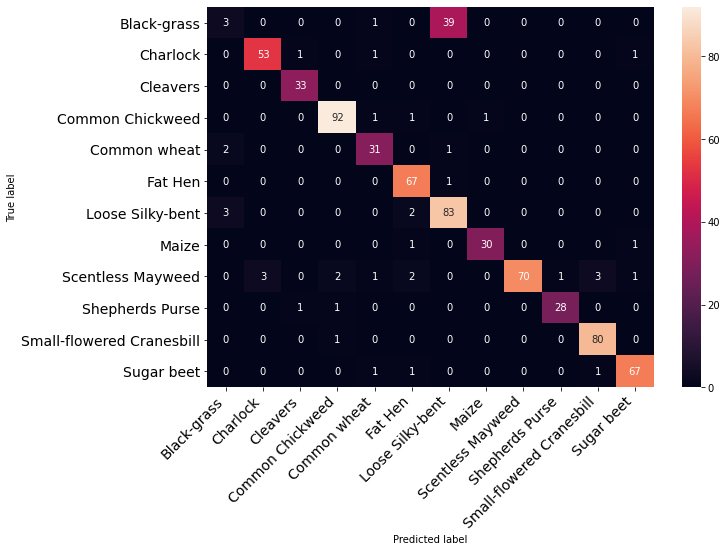

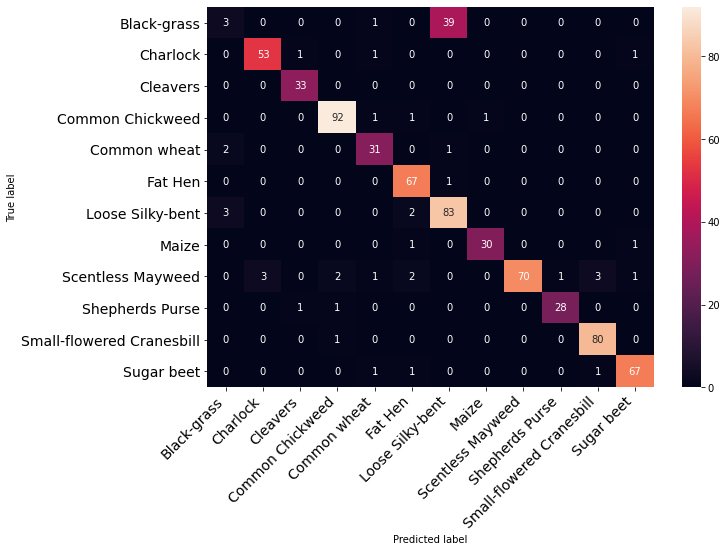

In [31]:
# confusion matrix of labels
predicted_classes=model.predict_classes(x_test_main)    
cm1 = confusion_matrix(np.argmax(np.asarray(y_test_main), axis=1),predicted_classes)

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig
class_names = list(one_hot_encode.columns)
print_confusion_matrix(cm1, class_names)

# <font color='blue'>Step 6</font>

**Visualize predictions for**

x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. (5 Marks)

**x_test[2]**

In [32]:
print(one_hot_encode.columns)
print(predicted_classes[2])

classification = list(one_hot_encode.columns)
print(classification)
arr = np.array(classification) 
print(arr)

Index(['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed',
       'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize',
       'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill',
       'Sugar beet'],
      dtype='object')
6
['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']
['Black-grass' 'Charlock' 'Cleavers' 'Common Chickweed' 'Common wheat'
 'Fat Hen' 'Loose Silky-bent' 'Maize' 'Scentless Mayweed'
 'Shepherds Purse' 'Small-flowered Cranesbill' 'Sugar beet']


6
Actual label: Loose Silky-bent
Input image shape: (1, 128, 128, 3)
Predict Label: Loose Silky-bent
Instructions for updating:
Please use `model.predict()` instead.

Predict Probability:
 [[2.5691558e-02 1.3786167e-08 1.7178365e-06 4.9815992e-07 3.0233781e-05
  5.7910540e-05 9.7420382e-01 8.6992280e-08 4.1300427e-06 4.1582012e-08
  9.6559916e-06 3.7191376e-07]]


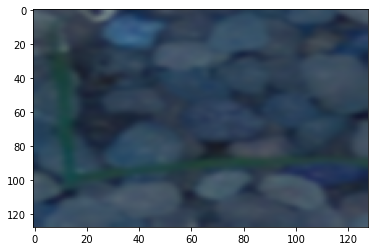

In [33]:

img_idx = 2
plt.imshow(x_test_main[img_idx],aspect='auto')
print(np.argmax(np.asarray(y_test_main)[img_idx]))
print('Actual label:', arr[np.argmax(np.asarray(y_test_main)[img_idx])])

# Preper image to predict
test_image =np.expand_dims(x_test_main[img_idx], axis=0)
print('Input image shape:',test_image.shape)
print('Predict Label:',arr[model.predict_classes(test_image,batch_size=1)[0]])
print('\nPredict Probability:\n', model.predict_proba(test_image,batch_size=1))
predictions = model.predict_proba(test_image,batch_size=1)

In [34]:
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions
for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
#Show the sorted labels in order from highest probability to lowest
print(list_index)

[6, 0, 5, 4, 8, 2, 3, 7, 9, 1]


In [36]:
i=0
for i in range(5):
  print(arr[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')

Loose Silky-bent : 97.42 %
Black-grass : 2.57 %
Fat Hen : 0.01 %
Common wheat : 0.0 %
Scentless Mayweed : 0.0 %


**x_test[3]**

5
Actual label: Fat Hen
Input image shape: (1, 128, 128, 3)
Predict Label: Fat Hen

Predict Probability:
 [[7.8428088e-04 4.1981571e-06 9.0049929e-05 2.7895517e-06 4.4079026e-04
  9.9814224e-01 1.7533251e-04 2.1520540e-05 3.7720824e-06 6.0615680e-06
  1.8041246e-04 1.4862987e-04]]


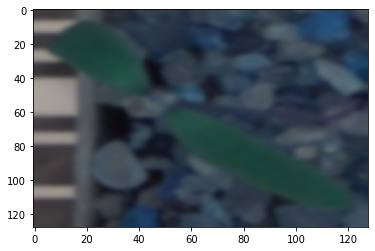

In [37]:
img_idx = 3
plt.imshow(x_test_main[img_idx],aspect='auto')
print(np.argmax(np.asarray(y_test_main)[img_idx]))
print('Actual label:', arr[np.argmax(np.asarray(y_test_main)[img_idx])])

# Preper image to predict
test_image =np.expand_dims(x_test_main[img_idx], axis=0)
print('Input image shape:',test_image.shape)
print('Predict Label:',arr[model.predict_classes(test_image,batch_size=1)[0]])
print('\nPredict Probability:\n', model.predict_proba(test_image,batch_size=1))
predictions = model.predict_proba(test_image,batch_size=1)

In [38]:
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions
for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
#Show the sorted labels in order from highest probability to lowest
print(list_index)

[5, 0, 4, 6, 2, 7, 9, 1, 8, 3]


In [39]:
i=0
for i in range(5):
  print(arr[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')

Fat Hen : 99.81 %
Black-grass : 0.08 %
Common wheat : 0.04 %
Loose Silky-bent : 0.02 %
Cleavers : 0.01 %


**x_test[33]**

10
Actual label: Small-flowered Cranesbill
Input image shape: (1, 128, 128, 3)
Predict Label: Small-flowered Cranesbill

Predict Probability:
 [[2.1933720e-07 7.5934690e-06 1.3762354e-05 2.1463582e-07 4.0723709e-08
  3.9519160e-04 8.6438000e-08 6.7124897e-06 1.8888997e-07 1.7776999e-06
  9.9957412e-01 3.7094075e-08]]


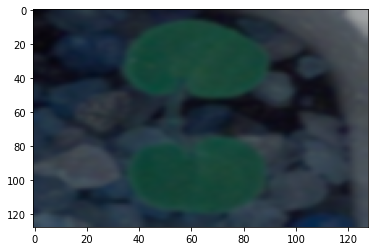

In [40]:
img_idx = 33
plt.imshow(x_test_main[img_idx],aspect='auto')
print(np.argmax(np.asarray(y_test_main)[img_idx]))
print('Actual label:', arr[np.argmax(np.asarray(y_test_main)[img_idx])])

# Preper image to predict
test_image =np.expand_dims(x_test_main[img_idx], axis=0)
print('Input image shape:',test_image.shape)
print('Predict Label:',arr[model.predict_classes(test_image,batch_size=1)[0]])
print('\nPredict Probability:\n', model.predict_proba(test_image,batch_size=1))
predictions = model.predict_proba(test_image,batch_size=1)

In [41]:
list_index = [0,1,2,3,4,5,6,7,8,9,10, 11, 12]
x = predictions
for i in range(12):
  for j in range(12):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
#Show the sorted labels in order from highest probability to lowest
print(list_index)

[10, 5, 2, 1, 7, 9, 0, 3, 8, 6, 4, 11, 12]


In [42]:
i=0
for i in range(5):
  print(arr[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')

Small-flowered Cranesbill : 99.96 %
Fat Hen : 0.04 %
Cleavers : 0.0 %
Charlock : 0.0 %
Maize : 0.0 %


**x_test[36]**

0
Actual label: Black-grass
Input image shape: (1, 128, 128, 3)
Predict Label: Loose Silky-bent

Predict Probability:
 [[2.2640637e-01 6.3136131e-06 1.0800249e-04 6.2286090e-05 4.1878326e-03
  5.2142834e-05 7.6834482e-01 6.3072192e-05 4.1562770e-04 4.4834314e-06
  1.5083121e-04 1.9816635e-04]]


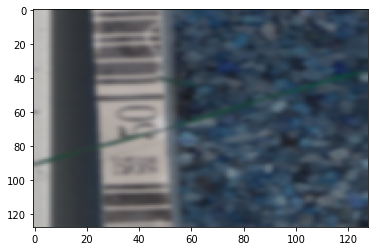

In [43]:
img_idx = 36
plt.imshow(x_test_main[img_idx],aspect='auto')
print(np.argmax(np.asarray(y_test_main)[img_idx]))
print('Actual label:', arr[np.argmax(np.asarray(y_test_main)[img_idx])])

# Preper image to predict
test_image =np.expand_dims(x_test_main[img_idx], axis=0)
print('Input image shape:',test_image.shape)
print('Predict Label:',arr[model.predict_classes(test_image,batch_size=1)[0]])
print('\nPredict Probability:\n', model.predict_proba(test_image,batch_size=1))
predictions = model.predict_proba(test_image,batch_size=1)

In [44]:
list_index = [0,1,2,3,4,5,6,7,8,9,10, 11, 12]
x = predictions
for i in range(12):
  for j in range(12):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
#Show the sorted labels in order from highest probability to lowest
print(list_index)

[6, 0, 4, 8, 11, 10, 2, 7, 3, 5, 1, 9, 12]


In [45]:
i=0
for i in range(5):
  print(arr[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')

Loose Silky-bent : 76.83 %
Black-grass : 22.64 %
Common wheat : 0.42 %
Scentless Mayweed : 0.04 %
Sugar beet : 0.02 %


**x_test[59]**

1
Actual label: Charlock
Input image shape: (1, 128, 128, 3)
Predict Label: Charlock

Predict Probability:
 [[4.9524527e-07 9.9666166e-01 2.0921417e-03 8.7799059e-08 1.1611669e-05
  1.0574094e-03 4.7990586e-08 7.4664080e-05 8.7994079e-07 2.4540748e-05
  6.4514046e-05 1.2013041e-05]]


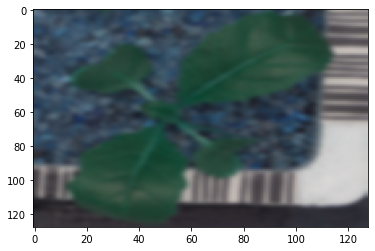

In [46]:
img_idx = 59
plt.imshow(x_test_main[img_idx],aspect='auto')
print(np.argmax(np.asarray(y_test_main)[img_idx]))
print('Actual label:', arr[np.argmax(np.asarray(y_test_main)[img_idx])])

# Preper image to predict
test_image =np.expand_dims(x_test_main[img_idx], axis=0)
print('Input image shape:',test_image.shape)
print('Predict Label:',arr[model.predict_classes(test_image,batch_size=1)[0]])
print('\nPredict Probability:\n', model.predict_proba(test_image,batch_size=1))
predictions = model.predict_proba(test_image,batch_size=1)

In [47]:
list_index = [0,1,2,3,4,5,6,7,8,9,10, 11, 12]
x = predictions
for i in range(12):
  for j in range(12):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp
#Show the sorted labels in order from highest probability to lowest
print(list_index)

[1, 2, 5, 7, 10, 9, 11, 4, 8, 0, 3, 6, 12]


In [48]:
i=0
for i in range(5):
  print(arr[list_index[i]], ':', round(predictions[0][list_index[i]] * 100, 2), '%')

Charlock : 99.67 %
Cleavers : 0.21 %
Fat Hen : 0.11 %
Maize : 0.01 %
Small-flowered Cranesbill : 0.01 %


**Summary**

```
Results of  x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]
```



**x_test[2]**

```
Actual label:      Loose Silky-bent
Input image shape: (1, 128, 128, 3)
Predict Label:     Loose Silky-bent

Predict Probability:
 [[7.5353995e-02 1.4756528e-06 1.0843598e-05 2.7666234e-05 2.2561562e-03
  6.3595908e-05 9.2225283e-01 3.6001506e-06 1.9510473e-05 7.9972335e-07
  6.7721548e-06 2.6952005e-06]]
  
  
Loose Silky-bent : 97.42 %
Black-grass : 2.57 %
Fat Hen : 0.01 %
Common wheat : 0.0 %
Scentless Mayweed : 0.0 %
```


**x_test[3]**

```
Actual label: Fat Hen
Input image shape: (1, 128, 128, 3)
Predict Label: Fat Hen

Predict Probability:
 [[2.8580516e-03 8.7372267e-05 5.7803758e-04 7.7866578e-05 1.2696057e-03
  9.9095118e-01 1.3372023e-03 4.5337580e-04 1.0751554e-04 1.9147097e-04
  1.1600091e-03 9.2826528e-04]]
  
  
  
Fat Hen : 99.81 %
Black-grass : 0.08 %
Common wheat : 0.04 %
Loose Silky-bent : 0.02 %
Cleavers : 0.01 %
```


**x_test[33]**

```
Actual label: Small-flowered Cranesbill
Input image shape: (1, 128, 128, 3)
Predict Label: Small-flowered Cranesbill

Predict Probability:
 [[3.2762779e-05 1.7888341e-02 7.2373445e-03 1.1215856e-04 1.4538159e-05
  1.6278451e-03 1.9059671e-05 6.5321289e-04 8.8676788e-06 8.6812896e-04
  9.7151089e-01 2.6710713e-05]]
  
Small-flowered Cranesbill : 99.96 %
Fat Hen : 0.04 %
Cleavers : 0.0 %
Charlock : 0.0 %
Maize : 0.0 %
```


**x_test[36]**


```
Actual label: Black-grass
Input image shape: (1, 128, 128, 3)
Predict Label: Loose Silky-bent

Predict Probability:
 [[7.9157226e-02 1.2187002e-06 7.3791716e-06 8.7070957e-06 1.5706893e-04
  4.3039045e-06 9.2043316e-01 5.0465736e-05 8.2355989e-05 3.6863113e-07
  5.3398195e-05 4.4289100e-05]]
  
Loose Silky-bent : 76.83 %
Black-grass : 22.64 %
Common wheat : 0.42 %
Scentless Mayweed : 0.04 %
Sugar beet : 0.02 %

```
**x_test[59]**

```
Actual label: Charlock
Input image shape: (1, 128, 128, 3)
Predict Label: Charlock

Predict Probability:
 [[5.4663229e-07 9.7652531e-01 2.3323124e-02 4.5248703e-09 6.0219395e-06
  7.2855437e-05 1.3099714e-08 4.1637163e-06 2.2212449e-05 2.7475864e-05
  1.4185928e-05 4.1118374e-06]]
  

Charlock : 99.67 %
Cleavers : 0.21 %
Fat Hen : 0.11 %
Maize : 0.01 %
Small-flowered Cranesbill : 0.01 %
```

# Conclusion

**Training Data**


loss: 0.2838 - accuracy: 0.8940

**Validation Data**


val_loss: 0.3418 - val_accuracy: 0.8890



**Test Data**

 loss: 0.2821 - accuracy: 0.8934
